In [9]:
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn import svm
from scipy.io import loadmat
import numpy as np
import seaborn as sns

model_type = ['rbf','linear','poly']

In [16]:
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x) 
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
def get_best_parameter(model_type,C_inf,gamma_inf):
    best_parameter = []
    for i in range(len(C_inf)):
        for j in range(len(gamma_inf)):
            model = svm.SVC(kernel = model_type,C = C_inf[i],gamma=gamma_inf[j])
            model.fit(data_train[:,:2],data_train[:,2].ravel())
            score_now = model.score(data_test[:,:2],data_test[:,2].ravel())
            best_parameter.append([C_inf[i],gamma_inf[j],score_now])
    return best_parameter

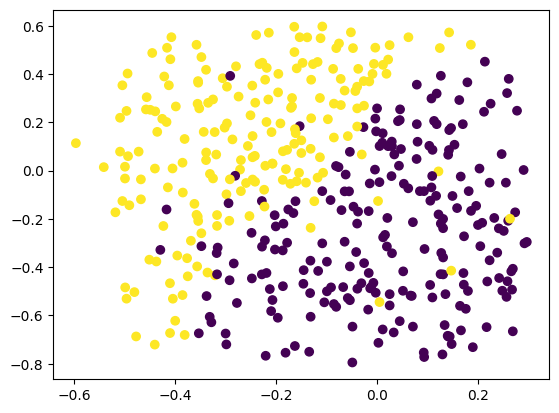

In [40]:
filename = 'data3.mat'
data_base = loadmat(filename)
data_train = np.hstack((data_base['X'],data_base['y']))
data_test = np.hstack((data_base['Xval'],data_base['yval']))
plt.scatter(data_train[:,0],data_train[:,1],c=data_train[:,2])
plt.scatter(data_test[:,0],data_test[:,1],c=data_test[:,2])

[[0.435 0.91  0.925 0.96  0.95  0.95  0.95  0.96  0.95  0.945 0.935]
 [0.435 0.875 0.91  0.95  0.96  0.95  0.95  0.96  0.96  0.955 0.945]
 [0.435 0.825 0.845 0.915 0.94  0.935 0.925 0.94  0.935 0.935 0.95 ]
 [0.435 0.805 0.825 0.905 0.925 0.93  0.935 0.93  0.93  0.93  0.94 ]
 [0.435 0.435 0.465 0.835 0.86  0.92  0.93  0.935 0.93  0.925 0.925]
 [0.435 0.435 0.435 0.81  0.845 0.91  0.925 0.93  0.935 0.925 0.925]
 [0.435 0.435 0.435 0.435 0.5   0.845 0.865 0.925 0.93  0.935 0.93 ]
 [0.435 0.435 0.435 0.435 0.435 0.815 0.845 0.91  0.925 0.93  0.935]
 [0.435 0.435 0.435 0.435 0.435 0.435 0.5   0.845 0.865 0.925 0.93 ]
 [0.435 0.435 0.435 0.435 0.435 0.435 0.435 0.815 0.845 0.91  0.925]
 [0.435 0.435 0.435 0.435 0.435 0.435 0.435 0.435 0.5   0.845 0.865]]


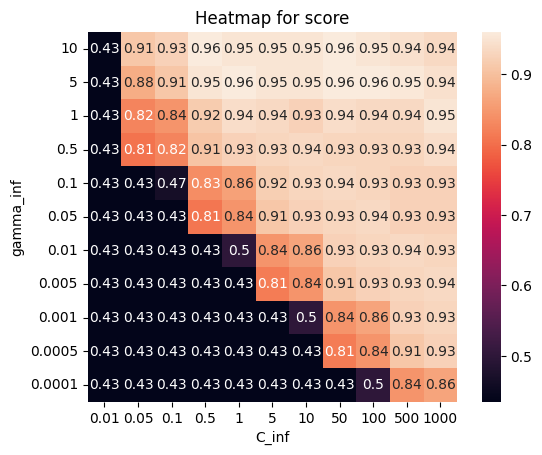

In [13]:
C_inf = [0.01,0.05,0.1,0.5,1,5,10,50,100,500,1000]
gamma_inf = [10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
best_parameter = get_best_parameter(model_type[0],C_inf,gamma_inf)

best_parameter = np.array(best_parameter)
score = best_parameter[:,2].reshape(len(C_inf),len(C_inf)).T
print(score)
# x_ticks = ['x-1', 'x-2', 'x-3']
# y_ticks = ['y-1', 'y-2', 'y-3']  # 自定义横纵轴
ax = sns.heatmap(score, xticklabels=C_inf,square=True,yticklabels=gamma_inf,annot=True)
ax.set_title('Heatmap for score')  # 图标题
ax.set_xlabel('C_inf')  # x轴标题
ax.set_ylabel('gamma_inf')
plt.show()

0.95


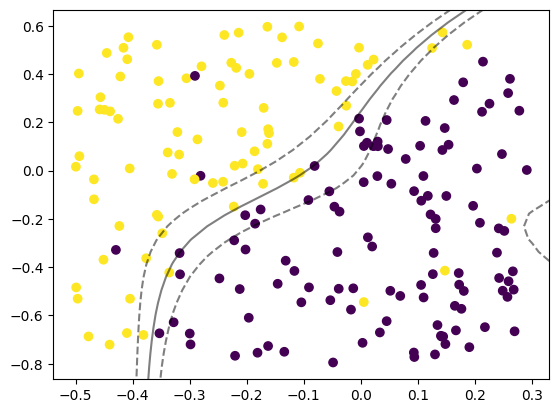

In [8]:
plt.scatter(data_test[:,0],data_test[:,1],c=data_test[:,2])
model = svm.SVC(kernel = model_type,C = 1000,gamma=1)
model.fit(data_train[:,:2],data_train[:,2].ravel())
score_now = model.score(data_test[:,:2],data_test[:,2].ravel())
print(score_now)
plot_svc_decision_function(model)

[[0.435 0.815 0.845 0.91  0.925 0.935 0.935 0.93  0.92  0.92  0.925]
 [0.435 0.815 0.845 0.91  0.925 0.935 0.935 0.93  0.92  0.92  0.925]
 [0.435 0.815 0.845 0.91  0.925 0.935 0.935 0.93  0.92  0.92  0.925]
 [0.435 0.815 0.845 0.91  0.925 0.935 0.935 0.93  0.92  0.92  0.925]
 [0.435 0.815 0.845 0.91  0.925 0.935 0.935 0.93  0.92  0.92  0.925]
 [0.435 0.815 0.845 0.91  0.925 0.935 0.935 0.93  0.92  0.92  0.925]
 [0.435 0.815 0.845 0.91  0.925 0.935 0.935 0.93  0.92  0.92  0.925]
 [0.435 0.815 0.845 0.91  0.925 0.935 0.935 0.93  0.92  0.92  0.925]
 [0.435 0.815 0.845 0.91  0.925 0.935 0.935 0.93  0.92  0.92  0.925]
 [0.435 0.815 0.845 0.91  0.925 0.935 0.935 0.93  0.92  0.92  0.925]
 [0.435 0.815 0.845 0.91  0.925 0.935 0.935 0.93  0.92  0.92  0.925]]


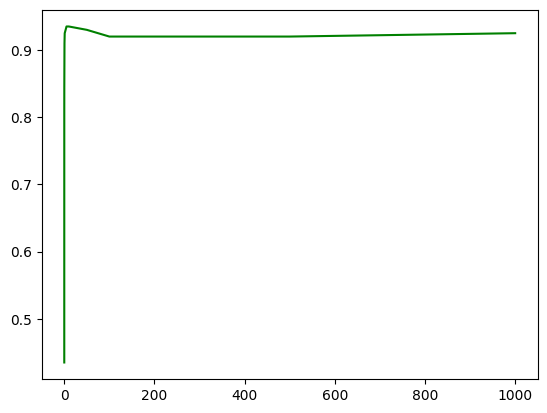

In [20]:
C_inf = [0.01,0.05,0.1,0.5,1,5,10,50,100,500,1000]
liner_test = get_best_parameter(model_type[1],C_inf,gamma_inf)

best_parameter = np.array(liner_test)
score = best_parameter[:,2].reshape(len(C_inf),len(C_inf)).T
print(score)
plt.plot(C_inf,score[0],c = 'g')
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50] [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
0.935


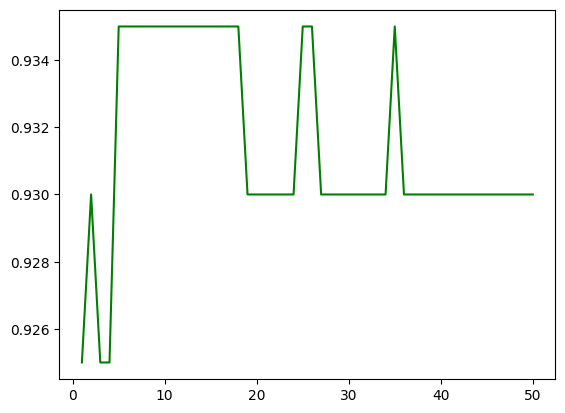

In [39]:
C_inf = np.arange(51)
gamma_inf = np.ones((1,50),dtype=int)
print(C_inf,gamma_inf)
liner_test = get_best_parameter(model_type[1],C_inf[1:],gamma_inf[0])

best_parameter = np.array(liner_test)
score = best_parameter[:,2].reshape(len(C_inf)-1,len(C_inf)-1).T
print(max(score[0]))
plt.plot(C_inf[1:],score[0],c = 'g')
plt.show()